In [1]:
# example.ipynb
# Authors: Stephan Meighen-Berger
# Example how to use ITM

In [2]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../")
from inthemoment import ITM, config

In [3]:
# Some settings
config['general']["random state seed"] = 44

In [4]:
itm = ITM()

Defining the sample
Setting the model pdf


In [5]:
# Generating the sample
itm.generate()

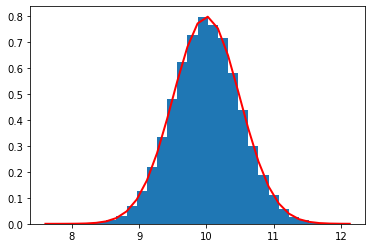

In [6]:
count, bins, ignored = plt.hist(itm.sample, 30, density=True)
plt.plot(bins, itm._sample_pdf(bins, config["sample"]["pdf"]["mean"], config["sample"]["pdf"]["sd"]),
         linewidth=2, color='r')
plt.show()

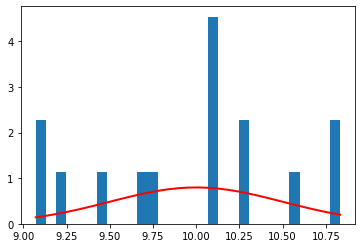

In [7]:
# The subset
count, bins, ignored = plt.hist(itm.subset, 30, density=True)
plt.plot(bins, itm._sample_pdf(bins, config["sample"]["pdf"]["mean"], config["sample"]["pdf"]["sd"]),
         linewidth=2, color='r')
plt.show()

In [8]:
 # Fitting
fit_res = itm.fit()

The subset has the following parameters
mu_subset= 9.968719247728488  sig_subset= 0.3051196914559078
Running the first level fit
mu_GMM1= 9.968719248928782  sig_GMM1= 0.5523763535237269
Re-Running the fit with improved errors
mu_GMM2= 9.968719248928767  sig_GMM2= 0.552376403510095
Running scipy to compare
mu_scipy= 9.968719247728488  sig_GMM2= 0.5523764037826994


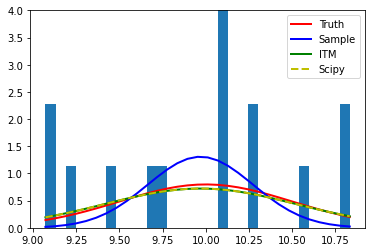

In [9]:
fig, ax = plt.subplots()
count, bins, ignored = plt.hist(itm.subset, 30, density=True)
ax.plot(bins, itm._sample_pdf(bins, config["sample"]["pdf"]["mean"], config["sample"]["pdf"]["sd"]),
         linewidth=2, color='r', label='Truth')
ax.plot(bins, itm._pdf(bins, *fit_res[0]), label="Sample",
         linewidth=2, color='b')
ax.plot(bins, itm._pdf(bins, *fit_res[2]), label='ITM',
         linewidth=2, color='g')
ax.plot(bins, itm._pdf(bins, *fit_res[3]), label='Scipy',
         linewidth=2, color='y', ls='--')
ax.legend()
ax.set_ylim(0., 4)
plt.show()
fig.savefig("fit_res.png", facecolor='white', dpi=500)